Exploratory data analysis (EDA) is a crucial component of data science which allows one to understand the basics of what your data looks like and what kinds of questions might be answered by them. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, answer the following questions by writing code in the cells.


In [71]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline


In [72]:
#### load the movie dataset and create their dataframes

movies_df = pd.read_csv("movies.csv")

movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [73]:
movies_df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


### Data Cleansing 
#### Clean the data. Identify columns that are redundant or unnecessary.

It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns ['keywords', 'homepage', 'status', 'tagline', 'original_language', 'overview', 'production_companies', 'original_title'] from the data set as they will not be used in the analysis.

In [39]:
# code here
columns_to_remove = ['keywords', 'homepage', 'status', 'tagline', 'original_language', 'overview', 'production_companies', 'original_title']
movies_df.drop(columns = columns_to_remove, inplace = True)

movies_df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124


#### Remove any duplicate rows

In [40]:
# code here

# Check for duplicate rows
duplicate_rows = movies_df[movies_df.duplicated()]
num_duplicate_rows = len(duplicate_rows)

# Print the duplicate rows and the number of duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)
print("Number of Duplicate Rows:", num_duplicate_rows)


movies_df.drop_duplicates(inplace=True)


Duplicate Rows:
Empty DataFrame
Columns: [budget, genres, id, popularity, production_countries, release_date, revenue, runtime, spoken_languages, title, vote_average, vote_count]
Index: []
Number of Duplicate Rows: 0


#### Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [41]:

# Using shape attribute
num_rows1 = movies_df.shape[0]
print("Number of rows:", num_rows1)

# Code here
# filters the dataframe movies_df and keeps only the rows where both the budget and revenue are not equal to zero. 
movies_df = movies_df[(movies_df['budget'] != 0) & (movies_df['revenue'] != 0)]

# Using len() function
num_rows2 = len(movies_df)
print("Number of rows:", num_rows2)

zero_budget_revenue = num_rows1 - num_rows2
print("Number of zero_budget_revenue:", zero_budget_revenue)

movies_df.head()

Number of rows: 4803
Number of rows: 3229
Number of zero_budget_revenue: 1574


,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124


#### To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into Date format and extract the year from the date. This will help us in analysing yearly data.

In [42]:
# Change the release_date column to DateTime column
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])

# Extract the release year from every release date
movies_df['release_year'] = movies_df['release_date'].dt.year

movies_df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800,2009
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500,2007
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466,2015
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106,2012
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124,2012


#### Change budget and revenue columns format to integer using numpy’s int64 method.

In [43]:
# code here

# Convert 'budget' column to integer format
movies_df['budget'] = movies_df['budget'].astype(np.int64)

# Convert 'revenue' column to integer format
movies_df['revenue'] = movies_df['revenue'].astype(np.int64)


On checking the dataset, we see that genres, keywords, production_companies, production_countries, spoken_languages are in the JSON format which will make it difficult to manipulate the dataframe. Now let’s flatten these columns into a format that can be easily interpreted.

In [21]:
def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted

    Results:
        movies_df will have column dropped and replaced with a new column for each unique value
        For example, if the "genres" column had an "Action" in it, there will be a new column
        called "genres_Action". Every movie that had the "Action" genre will have a 1 in that column,
        and 0 otherwise.
    """
    global movies_df # ensure that we can directly manipulate movies_df
    new_columns = {} # Keeps a track of all unique names
    for index,i in zip(movies_df.index,movies_df[column].apply(json.loads)):
        # For each Dataframe index, zipped with a JSON object for that column
        # We want to get a list of all of the items associated with 'key'
        list1=[]
        for j in range(len(i)):
            # For each item in the current JSON object
            list1.append((i[j][key]))# Append the item to a list
        for item in list1:
            # For each item found, append to movies_df
            if f"{column}_{item}" not in new_columns.keys():
                # If this item doesn't have a corresponding column, create one
                new_columns[f"{column}_{item}"] = np.array([0] * movies_df.shape[0])
            new_columns[f"{column}_{item}"][index] = 1
    # Concatenate new columns to movies_df
    movies_df = pd.concat([movies_df, pd.DataFrame(new_columns)], axis=1).drop(column, axis=1)
            
    
parse_col_json('genres', 'name')
parse_col_json('spoken_languages', 'name')
parse_col_json('production_countries', 'name')


movies_df.columns

IndexError: index 3229 is out of bounds for axis 0 with size 3229

In [44]:
import json
import pandas as pd

# Flatten the "genres" column
movies_df['genres'] = movies_df['genres'].apply(lambda x: ', '.join([genre['name'] for genre in ast.literal_eval(x)]))


# Flatten production_countries column
movies_df['production_countries'] = movies_df['production_countries'].apply(lambda y: ', '.join([production_country['name'] for production_country in ast.literal_eval(y)]))


# Flatten spoken_languages column
movies_df['spoken_languages'] = movies_df['spoken_languages'].apply(lambda z: ', '.join([spoken_language['name'] for spoken_language in ast.literal_eval(z)]))


movies_df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
0,237000000,"Action, Adventure, Fantasy, Science Fiction",19995,150.437577,"United States of America, United Kingdom",2009-12-10,2787965087,162.0,"English, Español",Avatar,7.2,11800,2009
1,300000000,"Adventure, Fantasy, Action",285,139.082615,United States of America,2007-05-19,961000000,169.0,English,Pirates of the Caribbean: At World's End,6.9,4500,2007
2,245000000,"Action, Adventure, Crime",206647,107.376788,"United Kingdom, United States of America",2015-10-26,880674609,148.0,"Français, English, Español, Italiano, Deutsch",Spectre,6.3,4466,2015
3,250000000,"Action, Crime, Drama, Thriller",49026,112.312950,United States of America,2012-07-16,1084939099,165.0,English,The Dark Knight Rises,7.6,9106,2012
4,260000000,"Action, Adventure, Science Fiction",49529,43.926995,United States of America,2012-03-07,284139100,132.0,English,John Carter,6.1,2124,2012


### Finding Certain Genres
Let's say that we want to locate all movies in the "Action" genre. With this new format, it becomes a simple matter.


In [45]:
action_movies = movies_df[movies_df.genres_Action == 1]
action_movies.head()

AttributeError: 'DataFrame' object has no attribute 'genres_Action'

In [46]:
action_movies = movies_df[movies_df.genres == "Action"]
action_movies.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
44,190000000,Action,168259,102.322217,"Japan, United States of America",2015-04-01,1506249360,137.0,English,Furious 7,7.3,4176,2015
162,135000000,Action,10048,17.889530,United States of America,2005-07-28,76932943,121.0,"English, Deutsch, 한국어/조선말, Pусский, Español",Stealth,4.9,331,2005
560,94000000,Action,10477,8.468586,"Australia, Canada, United States of America",2001-04-27,54744738,116.0,"English, Deutsch, Español",Driven,4.5,179,2001
708,61000000,Action,294254,113.161483,United States of America,2015-09-09,311256926,132.0,English,Maze Runner: The Scorch Trials,6.4,3040,2015
750,60000000,Action,16995,21.685719,"France, United Kingdom, United States of America",2009-04-17,87784194,127.0,"广州话 / 廣州話, English",State of Play,6.7,484,2009


### Now onto the exploration

#### Identify relationships between variables / features

The main goal here is to identify and create relationships which can help you to build ideas. I have defined questions which can help you identify some relationships to explore.

#### Which are the 5 most expensive movies? How do the most expensive and cheapest movies compare? Exploring the most expensive movies help you explore if some movies are worth the money spent on them based on their performance and revenue generated.

In [47]:
# Code here
# Sort DataFrame by 'budget' column in descending order to get most expensive movies
most_expensive_movies = movies_df.sort_values(by='budget', ascending=False).head(5)

# Sort DataFrame by 'budget' column in ascending order to get cheapest movies
cheapest_movies = movies_df.sort_values(by='budget', ascending=True).head(5)

# Print the most expensive movies
print("Most Expensive Movies:")
print(most_expensive_movies[['title', 'budget', 'revenue']])

# Print the cheapest movies
print("\nCheapest Movies:")
print(cheapest_movies[['title', 'budget', 'revenue']])



Most Expensive Movies:
                                          title     budget     revenue
17  Pirates of the Caribbean: On Stranger Tides  380000000  1045713802
1      Pirates of the Caribbean: At World's End  300000000   961000000
7                       Avengers: Age of Ultron  280000000  1405403694
10                             Superman Returns  270000000   391081192
4                                   John Carter  260000000   284139100

Cheapest Movies:
                   title  budget  revenue
4238        Modern Times       1  8500000
3611  A Farewell to Arms       4       25
3372        Split Second       7        5
3419        Bran Nue Dae       7        7
4608        The Prophecy       8       16


The analysis of the most expensive and cheapest movies reveals interesting information about their budgets and revenues. Let's examine the findings:

Most Expensive Movies:

1. "Pirates of the Caribbean: On Stranger Tides" has the highest budget among all movies, amounting to $380,000,000. It generated a revenue of $1,045,713,802.

2. "Pirates of the Caribbean: At World's End" is the second most expensive movie, with a budget of $300,000,000. It earned a revenue of $961,000,000.

3. "Avengers: Age of Ultron" ranks third in terms of budget, with an expenditure of $280,000,000. It achieved a substantial revenue of $1,405,403,694.

4. "Superman Returns" had a budget of $270,000,000 and a revenue of $391,081,192.

5. "John Carter" rounds up the list with a budget of $260,000,000 and a revenue of $284,139,100.
Cheapest Movies:

"Modern Times" is the cheapest movie, with a budget of only $1. Surprisingly, it generated a revenue of $8,500,000.
1. "A Farewell to Arms" had a budget of $4, but its revenue was minimal, amounting to $25.

2. "Split Second" had a slightly higher budget of $7 but only managed to earn $5 in revenue.

3. "Bran Nue Dae" also had a budget of $7 but generated a revenue of $7.

4. "The Prophecy" had a budget of $8 and managed to earn $16 in revenue.

By comparing the most expensive and cheapest movies, we can observe a significant difference in their budgets and revenues. The most expensive movies tend to have budgets in the hundreds of millions and generate billions of dollars in revenue. On the other hand, the cheapest movies have extremely low budgets, some as low as $1, and their revenue varies significantly, ranging from a few dollars to millions. This comparison highlights the diversity in the film industry, with both high-budget blockbusters and low-budget independent films coexisting and achieving varying levels of success in terms of revenue.

#### What are the top 5 most profitable movies? Compare the min and max profits. The comparison helps us indentify the different approaches which failed and succeeded. Subtracting the budget from the revenue generated, will return the profit earned.

In [48]:
# code here
# Calculate the profit for each movie
movies_df['profit'] = movies_df['revenue'] - movies_df['budget']

# Sort DataFrame by 'profit' column in descending order to get most profitable movies
most_profitable_movies = movies_df.sort_values(by='profit', ascending=False).head(5)

# Calculate the minimum and maximum profits
min_profit = movies_df['profit'].min()
max_profit = movies_df['profit'].max()

# Print the top 5 most profitable movies
print("Top 5 Most Profitable Movies:")
print(most_profitable_movies[['title', 'budget', 'revenue', 'profit']])

# Print the minimum and maximum profits
print("\nMinimum Profit:", min_profit)
print("Maximum Profit:", max_profit)




Top 5 Most Profitable Movies:
             title     budget     revenue      profit
0           Avatar  237000000  2787965087  2550965087
25         Titanic  200000000  1845034188  1645034188
28  Jurassic World  150000000  1513528810  1363528810
44       Furious 7  190000000  1506249360  1316249360
16    The Avengers  220000000  1519557910  1299557910

Minimum Profit: -165710090
Maximum Profit: 2550965087


The analysis of the top 5 most profitable movies provides insights into their budgets, revenues, and profits. Let's examine the findings:

1. "Avatar" is the most profitable movie on the list. It had a budget of $237,000,000 but generated a staggering revenue of $2,787,965,087, resulting in a profit of $2,550,965,087.

2. "Titanic" ranks second in terms of profitability. With a budget of $200,000,000, it earned a revenue of $1,845,034,188, leading to a profit of $1,645,034,188.

3. "Jurassic World" is the third most profitable movie. It had a budget of $150,000,000 and achieved a revenue of $1,513,528,810, resulting in a profit of $1,363,528,810.

4. "Furious 7" secured the fourth position. It had a budget of $190,000,000 and earned a revenue of $1,506,249,360, leading to a profit of $1,316,249,360.

5. "The Avengers" completes the list of the top 5 most profitable movies. It had a budget of $220,000,000 and generated a revenue of $1,519,557,910, resulting in a profit of $1,299,557,910.

Minimum Profit: The movie with the lowest profit on the list had a negative value of $165,710,090. This implies that the movie didn't earn enough revenue to cover its budget and resulted in a loss.

Maximum Profit: The most profitable movie on the list had an impressive profit of $2,550,965,087.

The comparison of profits between these movies highlights the substantial financial success of these top performers. These movies have achieved remarkable revenues compared to their budgets, leading to exceptional profits. The highest-grossing movies often generate significant returns on investment, making them extremely lucrative ventures. However, it's important to note that profitability can vary greatly within the film industry, with some movies experiencing losses or minimal profits.

#### Find the most talked about movies. Sort the dataframe based on the popularity column.

#### Find Movies which are rated above 7



In [68]:
# Code here

most_talked_about_movies = movies_df.sort_values('popularity', ascending=False)

high_rated_movies = movies_df[movies_df['vote_average'] > 7]

print(high_rated_movies)



         budget                                       genres     id  \
0     237000000  Action, Adventure, Fantasy, Science Fiction  19995   
3     250000000               Action, Crime, Drama, Thriller  49026   
6     260000000                            Animation, Family  38757   
7     280000000           Action, Adventure, Science Fiction  99861   
8     250000000                   Adventure, Fantasy, Family    767   
...         ...                                          ...    ...   
4713     160000                         Documentary, History   1779   
4724      10000      Drama, Fantasy, Horror, Science Fiction    985   
4738      60000                     Mystery, Drama, Thriller    473   
4773      27000                                       Comedy   2292   
4792      20000             Crime, Horror, Mystery, Thriller  36095   

      popularity                      production_countries release_date  \
0     150.437577  United States of America, United Kingdom   2009-12-10 

#### Most successful genres — create a bar plot explaining the frequency of movies in each genre.

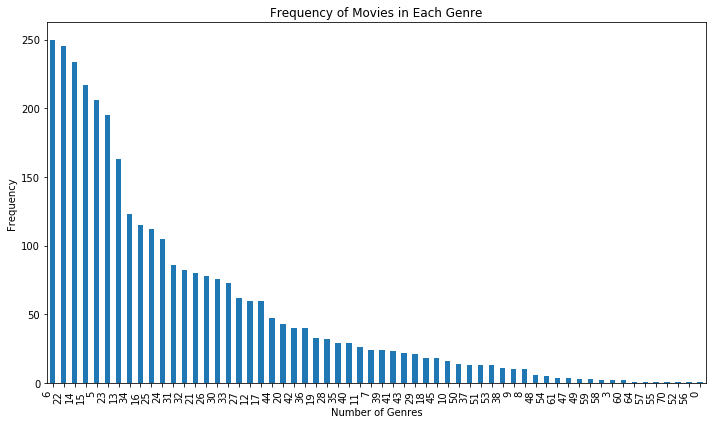

In [63]:
 # Code here
    
import matplotlib.pyplot as plt

# Calculate the frequency of each genre
genre_counts = movies_df['genres'].apply(lambda x: len(x))
genre_frequencies = genre_counts.value_counts()

# Create the bar plot
plt.figure(figsize=(10, 6))
genre_frequencies.plot(kind='bar')
plt.xlabel('Number of Genres')
plt.ylabel('Frequency')
plt.title('Frequency of Movies in Each Genre')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()  # Adjust the spacing between the plot elements
plt.show()



#### Generate three different interesting visualisations with a data story.


three different visualizations along with a data story that explores interesting insights from the dataset.

1. Box Plot of Movie Budgets by Genre:

Data Story: This visualization aims to explore the distribution of movie budgets across different genres.
Visualization: Create a box plot where the x-axis represents the genre and the y-axis represents the movie budget. Each box represents the budget range for a specific genre, showing the median, quartiles, and outliers if any. This plot helps identify genres that tend to have higher or lower budgets.

2. Scatter Plot of Movie Revenue vs. Popularity:

Data Story: This visualization aims to understand the relationship between a movie's revenue and its popularity.
Visualization: Create a scatter plot where the x-axis represents the popularity of the movie and the y-axis represents the revenue. Each point in the plot represents a movie, and its position indicates its popularity and revenue. This plot helps identify trends, such as whether highly popular movies tend to generate higher revenue.

3. Bar Plot of Movie Release Years:

Data Story: This visualization aims to analyze the distribution of movie releases over the years.
Visualization: Create a bar plot where the x-axis represents the release years and the y-axis represents the count of movies released in each year. Each bar represents a specific year, and its height indicates the number of movies released in that year. This plot helps identify patterns and trends in movie releases over time.






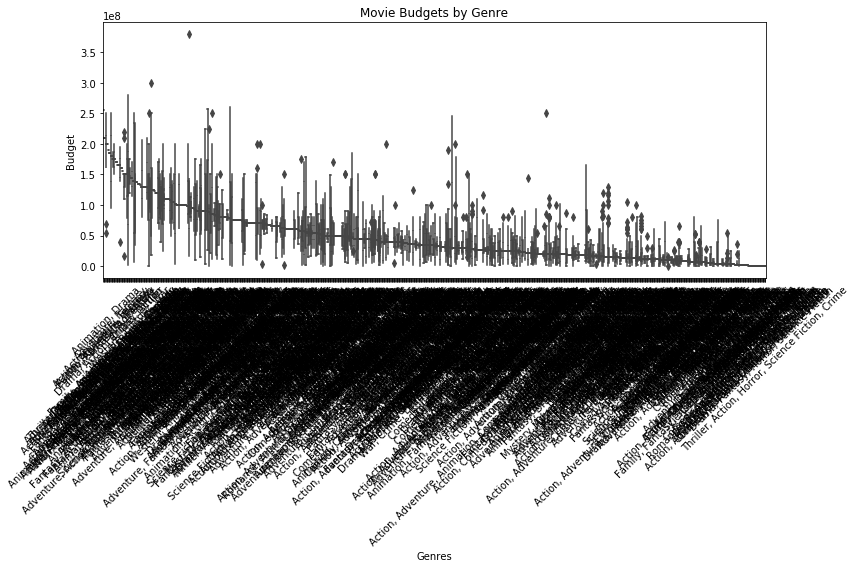

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group movies by genre and calculate the median budget for each genre
genre_budget_median = movies_df.groupby('genres')['budget'].median().sort_values(ascending=False)

# Sort genres by median budget in descending order
sorted_genres = genre_budget_median.index.tolist()

# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='genres', y='budget', data=movies_df, order=sorted_genres)
plt.xlabel('Genres')
plt.ylabel('Budget')
plt.title('Movie Budgets by Genre')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust the spacing between the plot elements
plt.show()


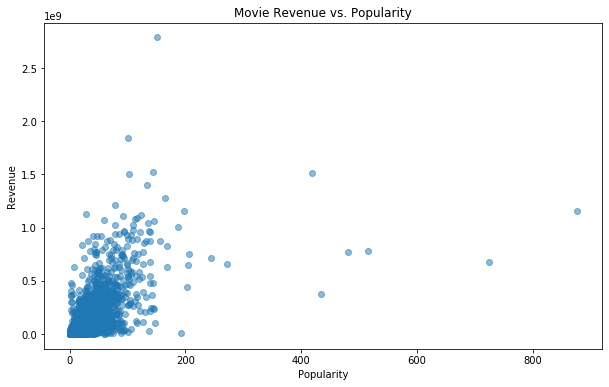

In [53]:
import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(movies_df['popularity'], movies_df['revenue'], alpha=0.5)
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.title('Movie Revenue vs. Popularity')
plt.show()


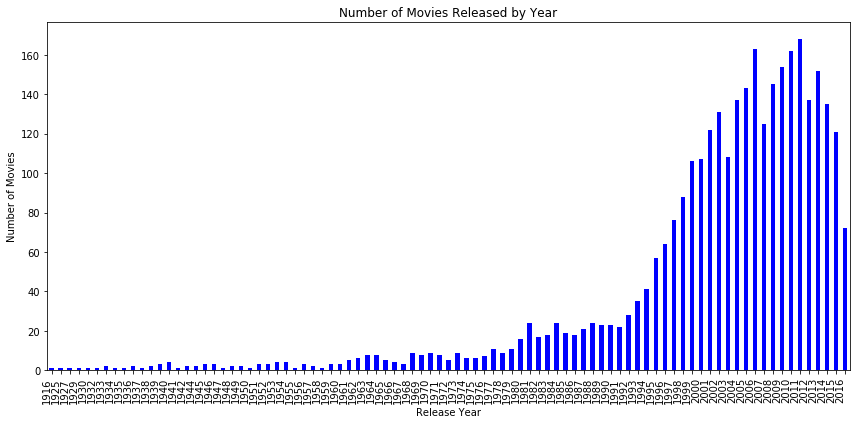

In [67]:
import matplotlib.pyplot as plt

# Count the number of movies released each year
release_years = movies_df['release_year'].value_counts().sort_index()

# Create the bar plot
plt.figure(figsize=(12, 6))
release_years.plot(kind='bar', color='blue')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released by Year')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()  # Adjust the spacing between the plot elements
plt.show()


# Now that you know how to Explore a Dataset, it's time for you to do it from start to end. Please find the Automobile Dataset in your task folder. 

### You are expected to create a report ('eda.docx' provides a template for what this report should look like) in which you explain your visualisations, investigations and findings. The Code for the Analysis should be in a jupyter notebook named automobile.ipynb.

## Be creative :)